# Data Analysis Tools-Assignment 1([Coursera](https://www.coursera.org/learn/data-analysis-tools))

## ANOVA and Post Hoc Tukey Test

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.color_palette("colorblind")
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [6]:
#-------Read Data-------
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
df = df.rename({'count':'count_of_rentals'},axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_of_rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df['season'] = df['season'].map({  1:'spring', 2:'summer', 3:'fall', 4:'winter' })

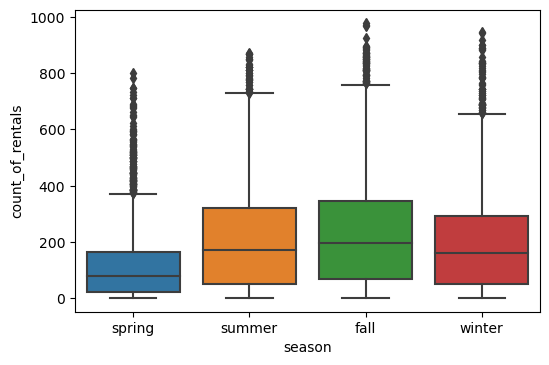

In [8]:
#-----Boxplot-----
sns.boxplot(x='season', y='count_of_rentals', data=df)
plt.show()

In [9]:
print('---Means of Rental Counts by Each Season---')
df.groupby('season')['count_of_rentals'].agg(['mean','std'])

---Means of Rental Counts by Each Season---


,mean,std
season,,
fall,234.417124,197.151001
spring,116.343261,125.273974
summer,215.251372,192.007843
winter,198.988296,177.622409


In [10]:
df['season'] = df['season'].astype('category')
season_map = dict(enumerate(df['season'].cat.categories))
df['season'] = df['season'].cat.codes

In [11]:
season_map

{0: 'fall', 1: 'spring', 2: 'summer', 3: 'winter'}

## ANOVA

An ANOVA test is used to infer if there is any relationship/dependecy between a Categorical Explanatoy Variable and an Continious Response Variable.

It quantifies the ratio between  variance of the group means to the mean of the within group variances.

In [12]:
#------Fit an Ordinary Least Square------
print('----Fit an OLS Regression----')
model = smf.ols(formula='count_of_rentals ~ C(season)', data=df).fit()
print (model.summary())

----Fit an OLS Regression----
                            OLS Regression Results                            
Dep. Variable:       count_of_rentals   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          6.16e-149
Time:                        20:25:55   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

### ANOVA test Inference:<br>
Since the p-value of the test is 6.16e-149(approximately 0), we fail to accept the Null Hypothesis and infer that the count of rentals on an avergae do differ for each season.

## Tukey Post Hoc Test

A ANOVA test which is significant doesn't tell us which groups are different from each other.<br>
We need a POST hoc test to tell which pair of groups have a difference of means which is statistically significant.

In [13]:
print('----Tukey Test Post Hoc----')
mc = multi.MultiComparison(df['count_of_rentals'], df['season'])
res = mc.tukeyhsd()
print(res.summary())

----Tukey Test Post Hoc----
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1 -118.0739  0.001 -130.3275 -105.8202   True
     0      2  -19.1658  0.001  -31.3661   -6.9654   True
     0      3  -35.4288  0.001  -47.6281  -23.2295   True
     1      2   98.9081  0.001   86.6545  111.1618   True
     1      3    82.645  0.001   70.3925   94.8976   True
     2      3  -16.2631 0.0035  -28.4624   -4.0638   True
---------------------------------------------------------


### Tukey Test Inference:<br>
The count of rentals actually differ for each pairs of seasons on an average **(reject=true)**.

## Inference
The mean count of rentals does differ across seasons, like it is certainly higher in the summers/fall as compared to winters/spring.